In [38]:
!pip install pandas scikit-learn folium matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import IFrame

In [27]:
df = pd.read_csv('UK_Accident data set.csv')

In [28]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,9114,201201LX50298,531330.0,173450,-0.111615,51.444766,1,3,1,1,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01003174,2012
1048568,9117,201201LX50301,530140.0,170990,-0.129632,51.422932,1,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01003144,2012
1048569,3,200501BS00004,526900.0,177530,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
1048570,4,200501BS00005,528060.0,179040,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [29]:
selected_columns = df[['Number_of_Vehicles', 'Number_of_Casualties', 'Road_Surface_Conditions', 'Weather_Conditions']]

In [30]:
selected_columns_cleaned = selected_columns.dropna()

In [31]:
print("\nSelected Columns After Cleaning:")
print(selected_columns_cleaned.head())


Selected Columns After Cleaning:
   Number_of_Vehicles  Number_of_Casualties Road_Surface_Conditions  \
0                   1                     1                Wet/Damp   
1                   1                     1                     Dry   
2                   2                     1                     Dry   
3                   1                     1                     Dry   
4                   1                     1                Wet/Damp   

           Weather_Conditions  
0  Raining without high winds  
1     Fine without high winds  
2     Fine without high winds  
3     Fine without high winds  
4     Fine without high winds  


In [32]:
null_values = selected_columns.isnull().sum()

In [33]:
print("Null Values in Selected Columns:")
print(null_values)

Null Values in Selected Columns:
Number_of_Vehicles         0
Number_of_Casualties       0
Road_Surface_Conditions    0
Weather_Conditions         0
dtype: int64


In [11]:
duplicates = selected_columns[selected_columns.duplicated(keep=False)]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
         Number_of_Vehicles  Number_of_Casualties Road_Surface_Conditions  \
0                         1                     1                Wet/Damp   
1                         1                     1                     Dry   
2                         2                     1                     Dry   
3                         1                     1                     Dry   
4                         1                     1                Wet/Damp   
...                     ...                   ...                     ...   
1048567                   1                     1                Wet/Damp   
1048568                   2                     1                     Dry   
1048569                   1                     1                     Dry   
1048570                   1                     1                Wet/Damp   
1048571                   2                     1                Wet/Damp   

                 Weather_Conditions  
0        Raining with

In [50]:
selected_columns_reduced = selected_columns.head(100)

In [51]:
print(selected_columns_reduced)

    Number_of_Vehicles  Number_of_Casualties Road_Surface_Conditions  \
0                    1                     1                Wet/Damp   
1                    1                     1                     Dry   
2                    2                     1                     Dry   
3                    1                     1                     Dry   
4                    1                     1                Wet/Damp   
..                 ...                   ...                     ...   
95                   2                     1                     Dry   
96                   2                     1                     Dry   
97                   3                     1                     Dry   
98                   3                     2                     Dry   
99                   1                     1                Wet/Damp   

            Weather_Conditions  
0   Raining without high winds  
1      Fine without high winds  
2      Fine without high winds  
3  

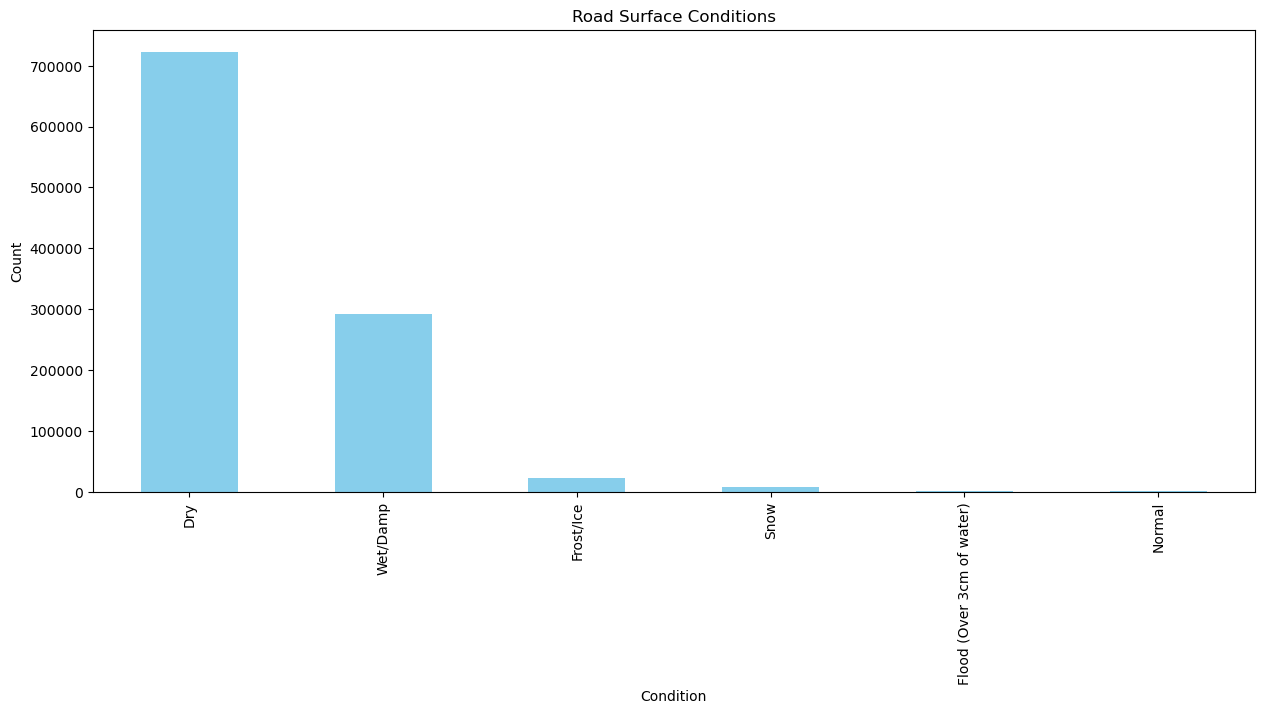

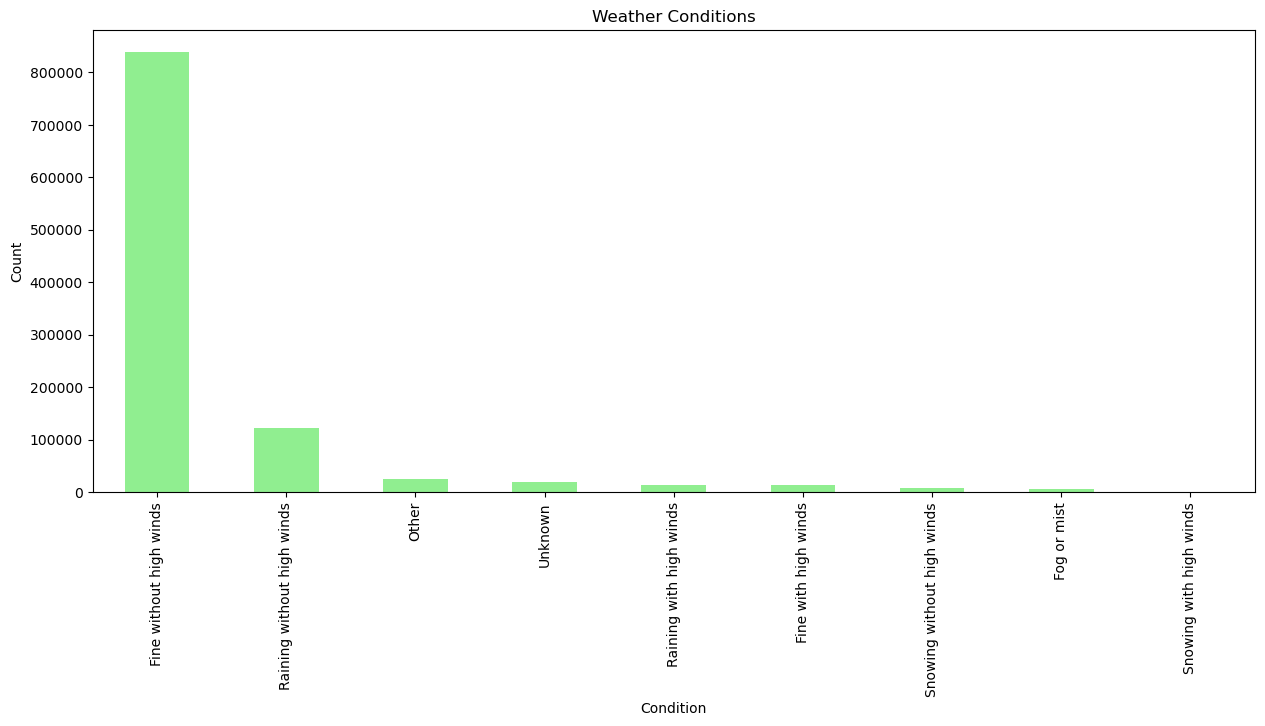

In [55]:
# Plot for Road Surface Conditions with adjusted figure size
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
selected_columns['Road_Surface_Conditions'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Road Surface Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# Plot for Weather Conditions with adjusted figure size
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
selected_columns['Weather_Conditions'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Weather Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


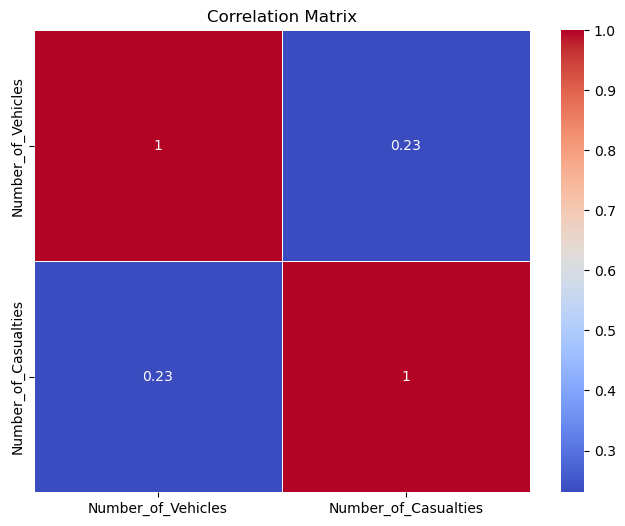

In [54]:
import seaborn as sns

# Create a subset with numerical columns
numerical_subset = selected_columns[['Number_of_Vehicles', 'Number_of_Casualties']]

# Compute the correlation matrix
correlation_matrix = numerical_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


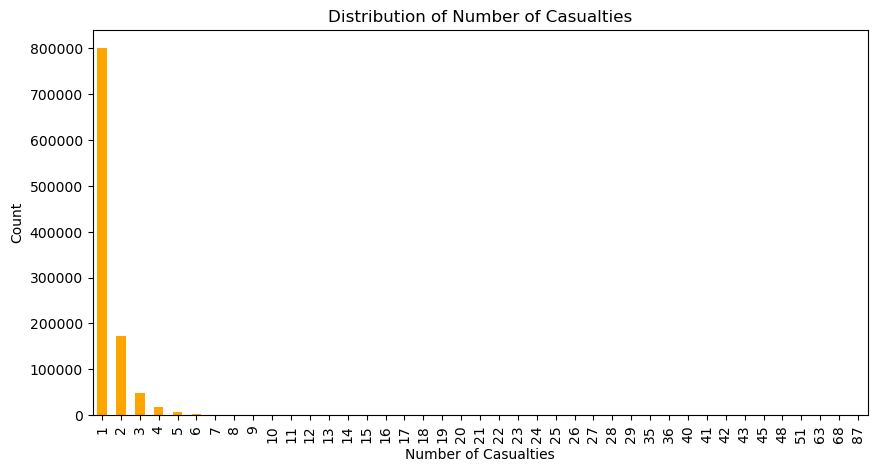

In [53]:
plt.figure(figsize=(10, 5))
selected_columns['Number_of_Casualties'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Count')
plt.show()


E:\Software\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


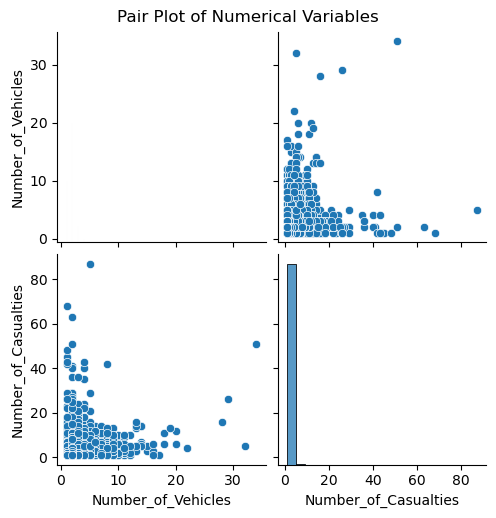

In [57]:
sns.pairplot(selected_columns[['Number_of_Vehicles', 'Number_of_Casualties']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()



In [58]:

data = selected_columns.copy()

data['Accident_Severity'] = (data['Number_of_Casualties'] > 1).astype(int)

# relevant features for analysis
features = ['Weather_Conditions', 'Road_Surface_Conditions']

# Preprocess the data
le = LabelEncoder()
data['Weather_Conditions'] = le.fit_transform(data['Weather_Conditions'])
data['Road_Surface_Conditions'] = le.fit_transform(data['Road_Surface_Conditions'])

# training and testing sets
X = data[features]
y = data['Accident_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7658298166559379
